In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [19]:
# Load data 
data=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [20]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [21]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Data Wrangling

##### Drop any column with few data points

In [22]:
# Drop column with missing data points
data.drop(['bpay_biller_code','merchant_code'],axis=1,inplace=True)

In [23]:
empty_rows=data[data.isnull().any(axis=1)]
print(empty_rows['status'].unique())
print(empty_rows['txn_description'].unique())
print(data['txn_description'].unique())
empty_rows.head()

['posted']
['PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']
['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
5,posted,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,2018-08-01,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
9,posted,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,Michael,466.58,2018-08-01,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit
10,posted,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,Fernando,4348.50,2018-08-01,...,19,NaN,NaN,2018-08-01T06:00:00.000+0000,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit
11,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,Kristin,1203.75,2018-08-01,...,43,NaN,NaN,2018-08-01T06:00:00.000+0000,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit
13,posted,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,Isaiah,4438.16,2018-08-01,...,23,NaN,NaN,2018-08-01T07:00:00.000+0000,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit


#### Insight: 
Transcation that are posted are missing values in 'card_present_flag', 'merchant_id', and etc. because it's not applicable. As a result, we should leave it as it is for now.

##### Check for Outliers

Text(0.5, 1.0, 'Age Boxplot')

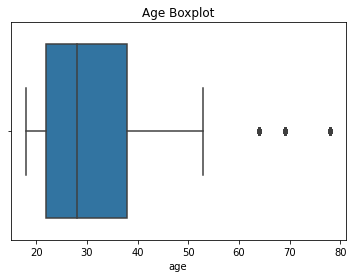

In [24]:
# Check for outliers in Age columns 
sns.boxplot(x=data['age'])
plt.title('Age Boxplot')

Text(0.5, 1.0, 'Transcation Amount Boxplot')

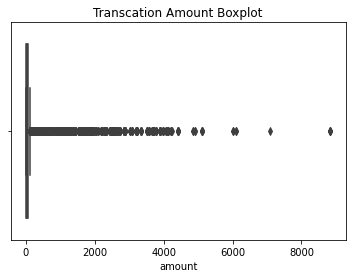

In [25]:
# Check for outliers in amount columns 
sns.boxplot(x=data['amount'])
plt.title('Transcation Amount Boxplot')

Text(0.5, 1.0, 'Balance Boxplot')

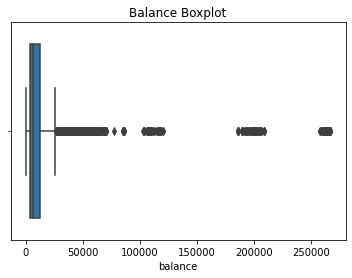

In [26]:
# Check for outliers in balance columns 
sns.boxplot(x=data['balance'])
plt.title('Balance Boxplot')

##### Data Reconstruction

In [27]:
# Create columns for date
data['day']=data['date'].dt.day
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year
data['day_name']=data['date'].dt.day_name()
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,amount,transaction_id,country,customer_id,merchant_long_lat,movement,day,month,year,day_name
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,8,2018,Wednesday
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1,8,2018,Wednesday
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,8,2018,Wednesday
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,8,2018,Wednesday
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,8,2018,Wednesday


In [28]:
# create longtiude and latitude columns
data['longtitude']=data['long_lat'].apply(lambda x: x.split()[0]).astype(float)
data['latitude']=data['long_lat'].apply(lambda x: x.split()[1]).astype(float)
data['merchant_long']=data[data['merchant_long_lat'].notnull()]['merchant_long_lat'].apply(lambda x: x.split()[0]).astype(float)
data['merchant_lat']=data[data['merchant_long_lat'].notnull()]['merchant_long_lat'].apply(lambda x: x.split()[1]).astype(float)

In [29]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_long_lat,movement,day,month,year,day_name,longtitude,latitude,merchant_long,merchant_lat
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,153.38 -27.99,debit,1,8,2018,Wednesday,153.41,-27.95,153.38,-27.99
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,151.21 -33.87,debit,1,8,2018,Wednesday,153.41,-27.95,151.21,-33.87
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,151.21 -33.87,debit,1,8,2018,Wednesday,151.23,-33.94,151.21,-33.87
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,153.05 -26.68,debit,1,8,2018,Wednesday,153.10,-27.66,153.05,-26.68
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,153.44 -28.06,debit,1,8,2018,Wednesday,153.41,-27.95,153.44,-28.06


# Data Storage

In [31]:
# Save the data in csv file for further usage
data.to_csv('ANZ_Data.csv')

# Data Visualization

I used Tableau for Data Visualization. Here's the link to it: https://public.tableau.com/views/ANZDataVisualization/DataOverview?:language=zh-Hans&:display_count=y&:origin=viz_share_link